# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import pathlib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
 

In [2]:
path =  pathlib.Path().parent.resolve()


In [3]:
df = pd.read_csv(path/'hapiness.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.drop(['Overall rank', 'Country or region'], axis = 1, inplace = True)
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df = df.rename(columns={"GDP per capita": "GDP", "Social support": "Social_support",  "Healthy life expectancy": "Life_exp",
                  "Freedom to make life choices": "Freedom", "Perceptions of corruption": "Corruption"})

In [6]:
print(df.columns)
print(df.count())

Index(['Score', 'GDP', 'Social_support', 'Life_exp', 'Freedom', 'Generosity',
       'Corruption'],
      dtype='object')
Score             156
GDP               156
Social_support    156
Life_exp          156
Freedom           156
Generosity        156
Corruption        156
dtype: int64


In [7]:
df.describe()

,Score,GDP,Social_support,Life_exp,Freedom,Generosity,Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


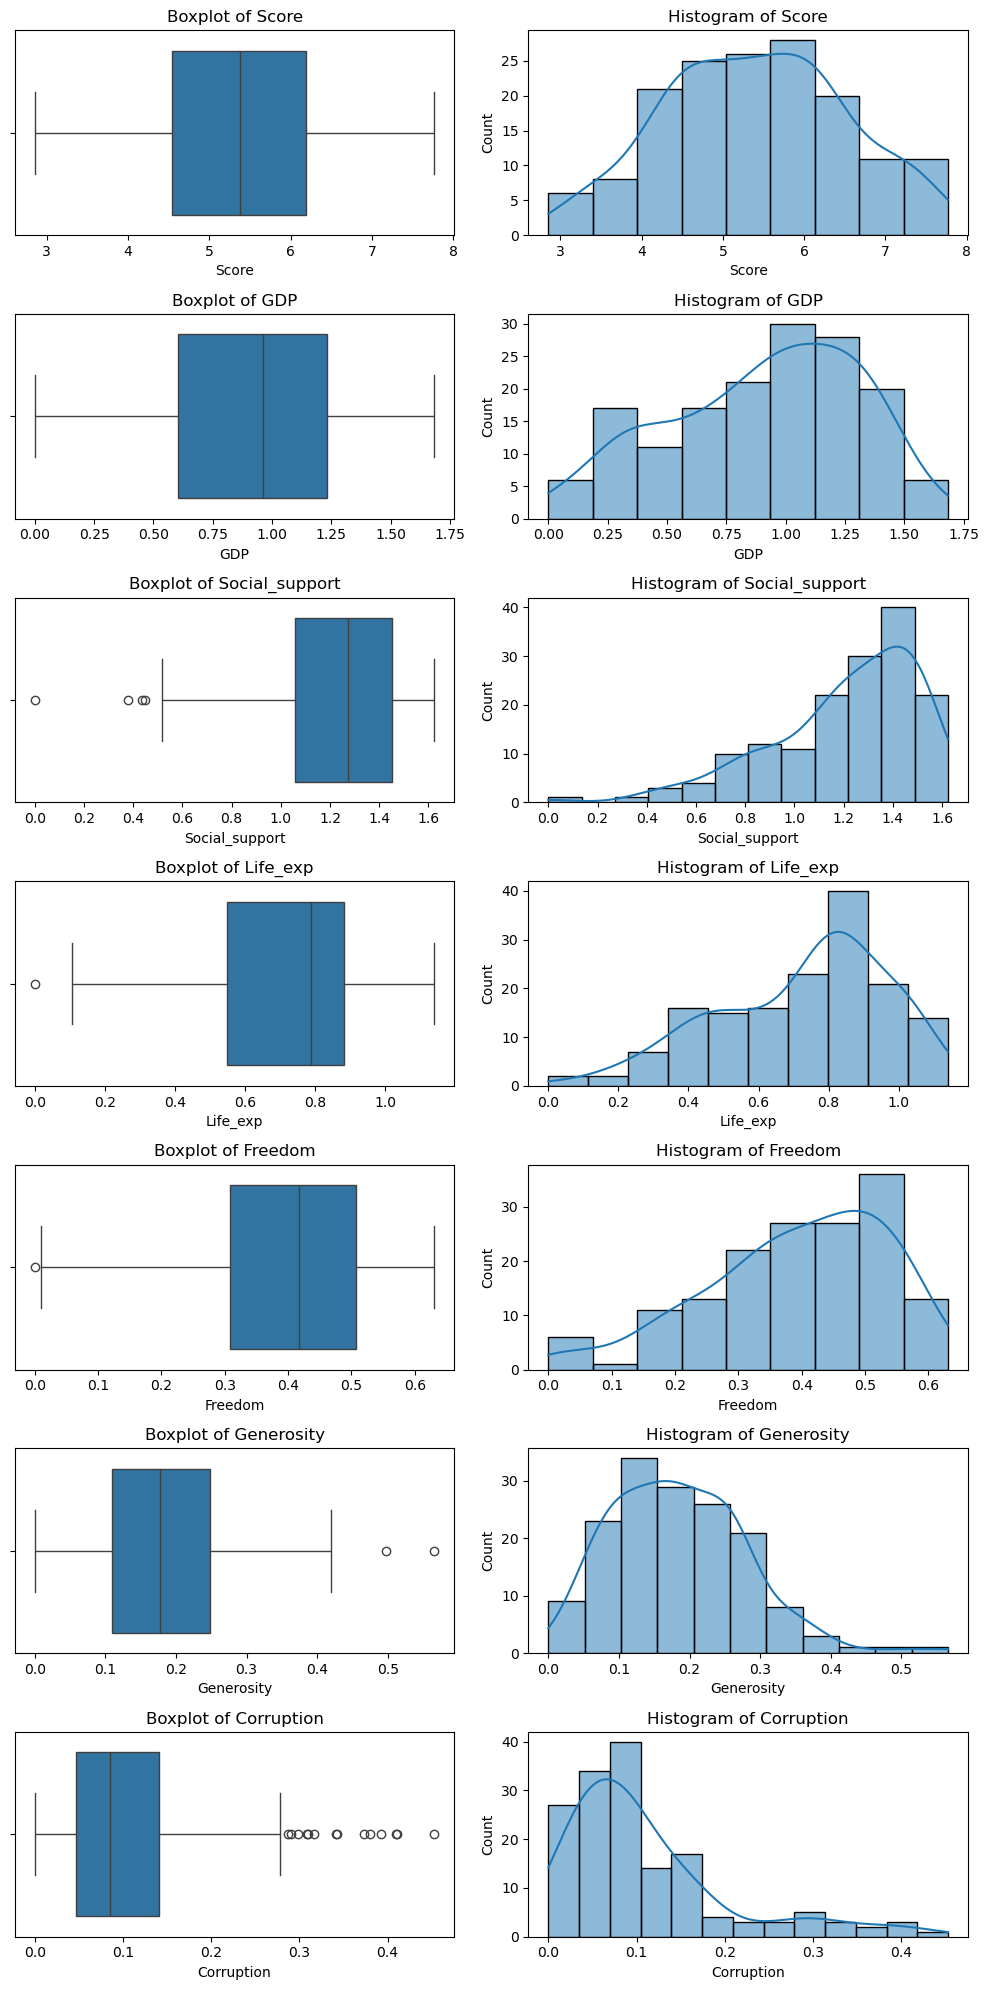

In [8]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axs[i, 0])
    axs[i, 0].set_title(f'Boxplot of {column}')
    sns.histplot(data=df, x=column, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

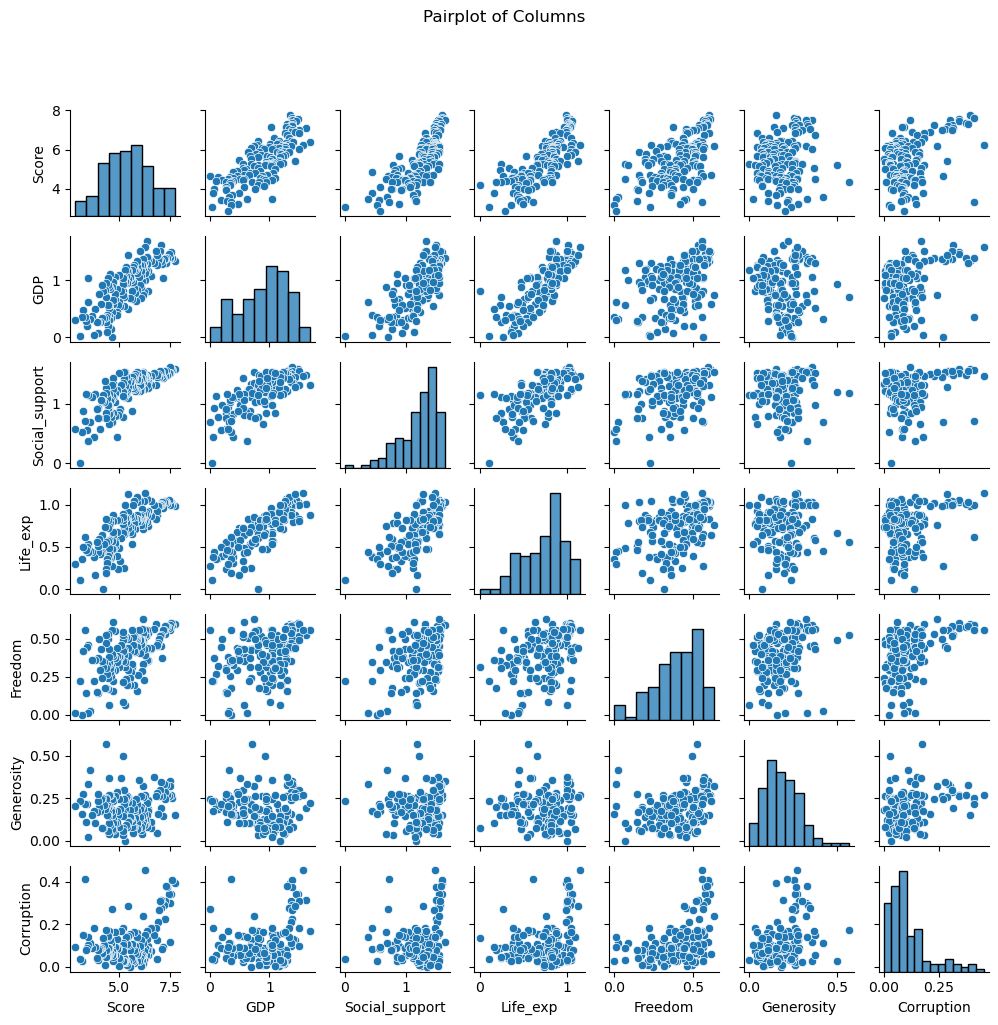

In [9]:
pairplot = sns.pairplot(df, height=2.5)
pairplot.fig.suptitle("Pairplot of Columns", y=1.02)
pairplot.fig.set_size_inches(10, 10)
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.savefig('pairplot.png', format='png', dpi=300) 
plt.show()


In [10]:
X = df[[col for col in df.columns if col !='Score']]
X = sm.add_constant(X)

In [11]:
print(X)

     const    GDP  Social_support  Life_exp  Freedom  Generosity  Corruption
0      1.0  1.340           1.587     0.986    0.596       0.153       0.393
1      1.0  1.383           1.573     0.996    0.592       0.252       0.410
2      1.0  1.488           1.582     1.028    0.603       0.271       0.341
3      1.0  1.380           1.624     1.026    0.591       0.354       0.118
4      1.0  1.396           1.522     0.999    0.557       0.322       0.298
..     ...    ...             ...       ...      ...         ...         ...
151    1.0  0.359           0.711     0.614    0.555       0.217       0.411
152    1.0  0.476           0.885     0.499    0.417       0.276       0.147
153    1.0  0.350           0.517     0.361    0.000       0.158       0.025
154    1.0  0.026           0.000     0.105    0.225       0.235       0.035
155    1.0  0.306           0.575     0.295    0.010       0.202       0.091

[156 rows x 7 columns]


In [12]:
y = df['Score']
print(y)

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64


In [13]:
full_model = sm.OLS(y, X).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.40e-46
Time:                        16:55:52   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7952      0.211      8.

In [14]:
X = X.drop(['Generosity', 'Corruption'], axis = 1)
reduced_model = sm.OLS(y, X).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     127.0
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.82e-47
Time:                        16:55:52   Log-Likelihood:                -122.62
No. Observations:                 156   AIC:                             255.2
Df Residuals:                     151   BIC:                             270.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8921      0.199      9.

In [15]:
anova_results = anova_lm(reduced_model, full_model)
print(anova_results)

   df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     151.0  43.992573      0.0       NaN       NaN       NaN
1     149.0  42.411713      2.0  1.580859  2.776922  0.065453


# PCA

In [16]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

In [17]:
# Initialize PCA
pca = PCA(n_components=4)  # Change n_components to the desired number of principal components

# Fit PCA on the standardized data
principal_components = pca.fit_transform(df_standardized)

# Convert the principal components to a DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(df_pca)


          PC1       PC2       PC3       PC4
0   -3.746708  1.081538 -1.899989 -0.306501
1   -3.807093  1.871530 -1.467247  0.229254
2   -3.835221  1.575102 -0.793495  0.226159
3   -3.174444  0.961139  1.552217  0.183021
4   -3.366053  1.709696 -0.214826  0.558081
..        ...       ...       ...       ...
151  1.270926  3.066995 -2.611579 -0.579754
152  2.122475  1.605333 -0.090630 -0.109628
153  4.423875 -0.556939 -0.436907  1.340104
154  5.492158  1.355893 -0.298901  0.038855
155  4.444309  0.192514 -0.663049  1.487053

[156 rows x 4 columns]


Eigenvalues: [3.83714122 1.4363465  0.61683937 0.55989636]
Trace (Sum of Eigenvalues): 6.450223447121685


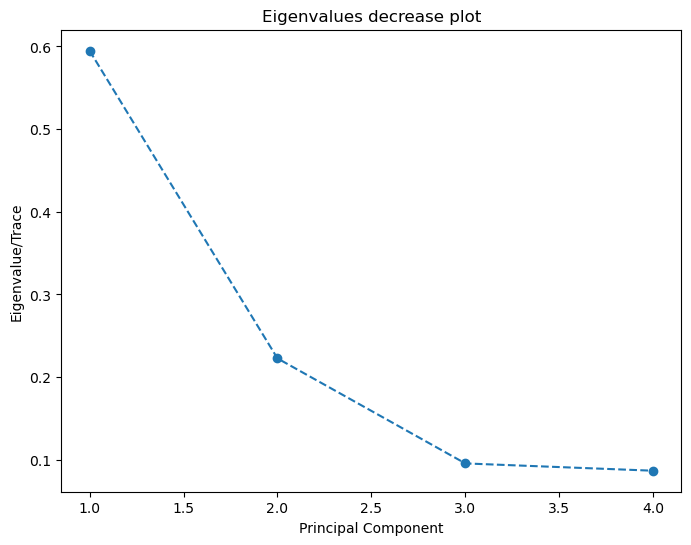

In [18]:
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

# Compute the Trace
trace = np.sum(eigenvalues)
print("Trace (Sum of Eigenvalues):", trace)

# Optional: Scree Plot for visualization
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues/trace, marker='o', linestyle='--')
plt.title('Eigenvalues decrease plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue/Trace')
plt.savefig('eigenvalues.png', format ='png')
plt.show()

In [19]:
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(df_standardized)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [21]:
ccircle = []
eucl_dist = []
for i,j in enumerate(df_standardized.T):
    corr1 = np.corrcoef(j,principal_components[:,0])[0,1]
    corr2 = np.corrcoef(j,principal_components[:,1])[0,1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))


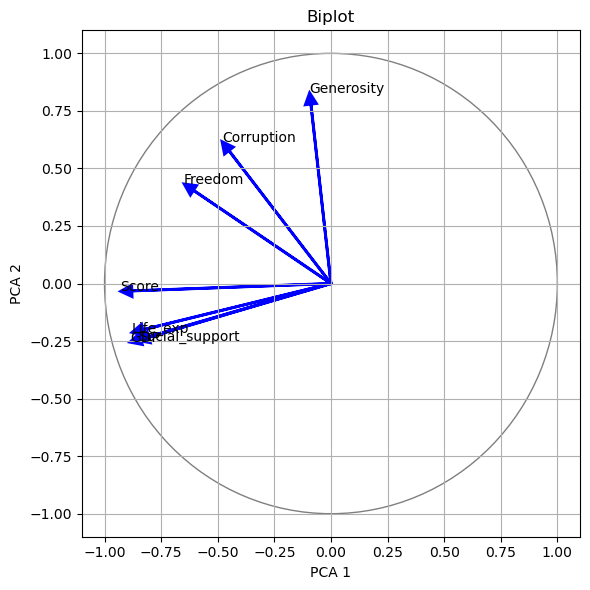

In [22]:

fig, axs = plt.subplots(figsize=(6, 6))
for i,j in enumerate(eucl_dist):
    arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min())/\
                            (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
    axs.arrow(0,0, # Arrows start at the origin
             ccircle[i][0],  #0 for PC1
             ccircle[i][1],  #1 for PC2
             lw = 2, # line width
             length_includes_head=True, 
             color = 'blue',
             fc = 'blue',
             head_width=0.05,
             head_length=0.05)
    axs.text(ccircle[i][0],ccircle[i][1], df.columns[i])
# Draw the unit circle, for clarity
circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
axs.set_title("Biplot")
axs.add_patch(circle)
axs.set_xlabel("PCA 1")
axs.set_ylabel("PCA 2")
plt.tight_layout()
plt.grid(True)
plt.savefig('biplot.png', format = 'png')
plt.show()

In [23]:
#points are less correlated 
#life exp and social support are strongly correlated
#all features are close to circle therefore first 2 directions of PCA explain the features well


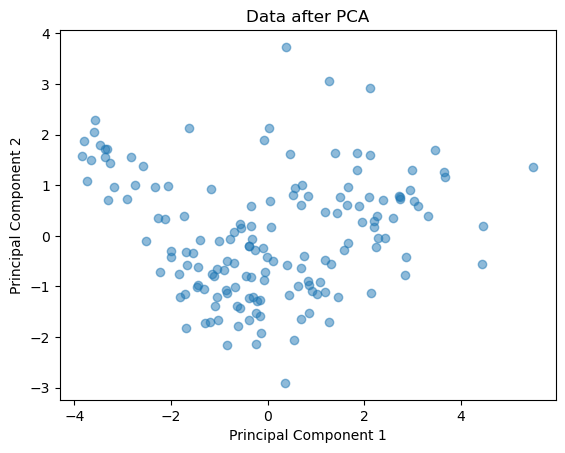

In [24]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')
plt.savefig('pca.png', format = 'png')
plt.show()

In [25]:
#eigenvalues of PCA

feature_vectors = pca.components_
print(feature_vectors)

[[-0.47586069 -0.4548248  -0.43658226 -0.45015043 -0.33220068 -0.04823293
  -0.2465113 ]
 [-0.02837147 -0.21337704 -0.20714812 -0.17785645  0.3621298   0.69380874
   0.51634628]]
